In [1]:
# Notebook for multiple linear regression models

In [24]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.feature_selection import f_regression

# Notebook Options
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pd.options.display.max_columns = None
pd.options.display.width = None

In [31]:
mlr_baseline_df = pd.read_csv('../data/baseline_500k_to_15mil.csv')

In [32]:
mlr_baseline_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,zip,month,year
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,4,7,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.190520,0,98055,5,2022
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,2,3,7,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.355910,0,98133,12,2021
2,775000.0,3,3.0,2160,1400,2.0,0,0,0,2,3,9,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.290200,0,98118,12,2021
3,592500.0,2,2.0,1120,758,2.0,0,0,1,0,3,7,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.071880,0,98027,8,2021
4,625000.0,2,1.0,1190,5688,1.0,0,0,1,0,3,7,Electricity,PUBLIC,1190,0,300,0,1948,47.763470,-122.340155,0,98133,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26116,719000.0,3,2.5,1270,1141,2.0,0,0,0,0,3,8,Gas,PUBLIC,1050,420,200,60,2007,47.690440,-122.370620,0,98117,10,2021
26117,1555000.0,5,2.0,1910,4000,1.5,0,0,0,0,4,8,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.329400,0,98103,11,2021
26118,1313000.0,3,2.0,2020,5800,2.0,0,0,0,1,3,7,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.388510,0,98116,6,2021
26119,800000.0,3,2.0,1620,3600,1.0,0,0,1,0,3,7,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.295850,0,98122,5,2022


In [33]:
# Convert price to log price and drop price
mlr_baseline_df['log_price'] = np.log1p(mlr_baseline_df['price'])
mlr_baseline_df = mlr_baseline_df.drop(columns=['price'], axis=1)
mlr_baseline_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,zip,month,year,log_price
0,4,1.0,1180,7140,1.0,0,0,0,0,4,7,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.190520,0,98055,5,2022,13.422469
1,5,2.5,2770,6703,1.0,0,0,1,2,3,7,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.355910,0,98133,12,2021,13.732130
2,3,3.0,2160,1400,2.0,0,0,0,2,3,9,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.290200,0,98118,12,2021,13.560620
3,2,2.0,1120,758,2.0,0,0,1,0,3,7,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.071880,0,98027,8,2021,13.292108
4,2,1.0,1190,5688,1.0,0,0,1,0,3,7,Electricity,PUBLIC,1190,0,300,0,1948,47.763470,-122.340155,0,98133,7,2021,13.345509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26116,3,2.5,1270,1141,2.0,0,0,0,0,3,8,Gas,PUBLIC,1050,420,200,60,2007,47.690440,-122.370620,0,98117,10,2021,13.485618
26117,5,2.0,1910,4000,1.5,0,0,0,0,4,8,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.329400,0,98103,11,2021,14.256987
26118,3,2.0,2020,5800,2.0,0,0,0,1,3,7,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.388510,0,98116,6,2021,14.087826
26119,3,2.0,1620,3600,1.0,0,0,1,0,3,7,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.295850,0,98122,5,2022,13.592368


In [34]:
mlr_baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26121 entries, 0 to 26120
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       26121 non-null  int64  
 1   bathrooms      26121 non-null  float64
 2   sqft_living    26121 non-null  int64  
 3   sqft_lot       26121 non-null  int64  
 4   floors         26121 non-null  float64
 5   waterfront     26121 non-null  int64  
 6   greenbelt      26121 non-null  int64  
 7   nuisance       26121 non-null  int64  
 8   view           26121 non-null  int64  
 9   condition      26121 non-null  int64  
 10  grade          26121 non-null  int64  
 11  heat_source    26121 non-null  object 
 12  sewer_system   26121 non-null  object 
 13  sqft_above     26121 non-null  int64  
 14  sqft_basement  26121 non-null  int64  
 15  sqft_garage    26121 non-null  int64  
 16  sqft_patio     26121 non-null  int64  
 17  yr_built       26121 non-null  int64  
 18  lat   

<AxesSubplot: ylabel='Frequency'>

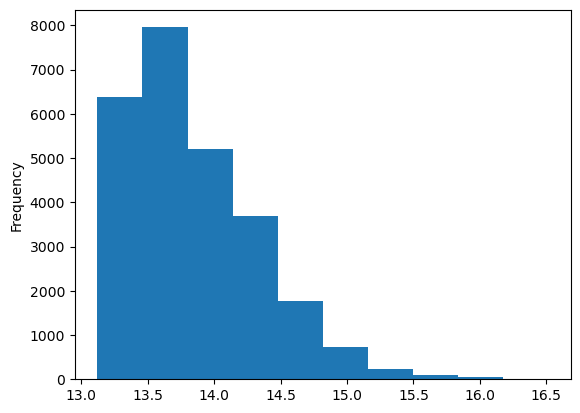

In [6]:
mlr_baseline_df['log_price'].plot(kind='hist')

## MLR Model 1

In [37]:
numeric_features_df = mlr_baseline_df.select_dtypes(
    exclude=['object']).drop('log_price', axis=1)

In [58]:
# Declare features and target variable
X = numeric_features_df
y = mlr_baseline_df['log_price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [59]:
# Calculate Regression Results
def regression_results(y_test, y_pred):
    
    # Compute regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    
    # Display formatted metrics
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [60]:
regression_results(y_test, y_pred)

explained_variance:  0.6956
mean_squared_log_error:  0.0003
r2:  0.6955
MAE:  0.1965
MSE:  0.0736
RMSE:  0.2712


In [62]:
print(lr.coef_)

[-6.21498948e-03  4.18318526e-02  8.63939097e-05  2.86140091e-07
 -1.91440523e-02  2.40614605e-01  5.34553740e-02 -1.38657063e-02
  6.71892488e-02  4.03820146e-02  1.39385114e-01  1.24651224e-04
  3.88432776e-05 -4.92872584e-05  3.62107132e-05 -2.02723873e-03
  1.42001906e+00  5.36245591e-02  7.12826037e-02 -1.13531417e-03
  8.13603607e-03  1.84058162e-01]


In [76]:
all_num_feature_summary_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])
print(all_num_feature_summary_df)

               Coefficients
bedrooms      -6.214989e-03
bathrooms      4.183185e-02
sqft_living    8.639391e-05
sqft_lot       2.861401e-07
floors        -1.914405e-02
waterfront     2.406146e-01
greenbelt      5.345537e-02
nuisance      -1.386571e-02
view           6.718925e-02
condition      4.038201e-02
grade          1.393851e-01
sqft_above     1.246512e-04
sqft_basement  3.884328e-05
sqft_garage   -4.928726e-05
sqft_patio     3.621071e-05
yr_built      -2.027239e-03
lat            1.420019e+00
long           5.362456e-02
renovated      7.128260e-02
zip           -1.135314e-03
month          8.136036e-03
year           1.840582e-01


In [77]:
f_values, p_values = f_regression(X, y)
print(f_values, p_values)

[3.33610545e+03 8.84572241e+03 1.91201781e+04 2.69618434e+02
 1.08782122e+03 7.07030598e+02 2.27181294e+02 9.45226419e-02
 2.66687426e+03 3.00184266e-01 1.69270473e+04 1.26032120e+04
 1.62431574e+03 2.14187467e+03 2.87311890e+03 1.47989962e+02
 4.59224066e+03 4.25528267e+02 2.51756262e+02 4.70042654e+02
 1.41071562e+02 2.36299187e+02] [0.00000000e+000 0.00000000e+000 0.00000000e+000 2.75685230e-060
 9.14868792e-234 9.86051291e-154 4.02952991e-051 7.58506867e-001
 0.00000000e+000 5.83771608e-001 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.89177251e-034
 0.00000000e+000 8.55667785e-094 1.97437823e-056 2.55803116e-103
 1.88143871e-032 4.30867723e-053]


In [80]:
# all_num_feature_summary_df['Coefficients'].astype('float64').round(8)
# all_num_feature_summary_df['f_values'] = f_values.astype('float64').round(8)
# all_num_feature_summary_df['p_values'] = p_values.astype('float64').round(8)
all_feature_summary_df

,Coefficients,f_values,p_values
bedrooms,-0.00621499,3336.10545447,0.00000000
bathrooms,0.04183185,8845.72240922,0.00000000
sqft_living,0.00008639,19120.17810749,0.00000000
sqft_lot,0.00000029,269.61843355,0.00000000
floors,-0.01914405,1087.82121685,0.00000000
waterfront,0.24061460,707.03059810,0.00000000
greenbelt,0.05345537,227.18129393,0.00000000
nuisance,-0.01386571,0.09452264,0.75850687
view,0.06718925,2666.87425605,0.00000000
condition,0.04038201,0.30018427,0.58377161


In [ ]:
# Drop Nuisance and Condition and rerun
regression_results(y_test, y_pred)

In [37]:
numeric_features_df = mlr_baseline_df.select_dtypes(
    exclude=['object']).drop('log_price', axis=1)

In [86]:
# Drop Nuisance and Condition and rerun

# Declare features and target variable
X = numeric_features_df.drop(columns=['nuisance', 'condition'])
y = mlr_baseline_df['log_price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [87]:
regression_results(y_test, y_pred)

explained_variance:  0.6921
mean_squared_log_error:  0.0003
r2:  0.6921
MAE:  0.1982
MSE:  0.0744
RMSE:  0.2728


In [89]:
# One hot encode sewer_system and heat_source to include in next model
df_sewer_system = pd.get_dummies(mlr_baseline_df['sewer_system'], prefix='sewer_system')
df_heat_source = pd.get_dummies(mlr_baseline_df['heat_source'], prefix='heat_source')
num_and_cat_features_df = pd.concat([numeric_features_df, df_sewer_system, df_heat_source], axis=1)
num_and_cat_features_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,zip,month,year,sewer_system_PRIVATE,sewer_system_PUBLIC,heat_source_Electricity,heat_source_Gas,heat_source_Oil,heat_source_Solar_Other
0,4,1.00000000,1180,7140,1.00000000,0,0,0,0,4,7,1180,0,0,40,1969,47.46197500,-122.19052000,0,98055,5,2022,0,1,0,1,0,0
1,5,2.50000000,2770,6703,1.00000000,0,0,1,2,3,7,1570,1570,0,240,1950,47.71152500,-122.35591000,0,98133,12,2021,0,1,0,0,1,0
2,3,3.00000000,2160,1400,2.00000000,0,0,0,2,3,9,1090,1070,200,270,2010,47.56611000,-122.29020000,0,98118,12,2021,0,1,0,1,0,0
3,2,2.00000000,1120,758,2.00000000,0,0,1,0,3,7,1120,550,550,30,2012,47.53247000,-122.07188000,0,98027,8,2021,0,1,1,0,0,0
4,2,1.00000000,1190,5688,1.00000000,0,0,1,0,3,7,1190,0,300,0,1948,47.76347000,-122.34015500,0,98133,7,2021,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26116,3,2.50000000,1270,1141,2.00000000,0,0,0,0,3,8,1050,420,200,60,2007,47.69044000,-122.37062000,0,98117,10,2021,0,1,0,1,0,0
26117,5,2.00000000,1910,4000,1.50000000,0,0,0,0,4,8,1600,1130,0,210,1921,47.66474000,-122.32940000,0,98103,11,2021,0,1,0,0,1,0
26118,3,2.00000000,2020,5800,2.00000000,0,0,0,1,3,7,2020,0,0,520,2011,47.56561000,-122.38851000,0,98116,6,2021,0,1,0,1,0,0
26119,3,2.00000000,1620,3600,1.00000000,0,0,1,0,3,7,940,920,240,110,1995,47.61039500,-122.29585000,0,98122,5,2022,0,1,0,1,0,0


## MLR Model #3


In [92]:
# Add nuisance and condition back in in addition to categorical dummy vars
X = num_and_cat_features_df
y = mlr_baseline_df['log_price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [93]:
regression_results(y_test, y_pred)

explained_variance:  0.6988
mean_squared_log_error:  0.0003
r2:  0.6987
MAE:  0.1953
MSE:  0.0728
RMSE:  0.2698


In [94]:
print(lr.coef_)

[-8.52806994e-03  3.97413732e-02  8.69837615e-05  4.27355857e-07
 -2.30489757e-02  2.56380842e-01  4.33860240e-02 -1.12416985e-02
  6.63880343e-02  4.24107615e-02  1.37863627e-01  1.24710956e-04
  3.81535552e-05 -5.08237205e-05  5.20510551e-05 -2.02855635e-03
  1.40762173e+00  1.04609929e-01  7.31021093e-02 -1.08100838e-03
  8.24740081e-03  1.84651506e-01 -3.38101769e-02  3.38101769e-02
 -3.11110452e-02 -3.75733450e-03 -1.82324095e-02  5.31007892e-02]


In [96]:
all_features_summary_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])
print(all_features_summary_df)

                         Coefficients
bedrooms                -8.528070e-03
bathrooms                3.974137e-02
sqft_living              8.698376e-05
sqft_lot                 4.273559e-07
floors                  -2.304898e-02
waterfront               2.563808e-01
greenbelt                4.338602e-02
nuisance                -1.124170e-02
view                     6.638803e-02
condition                4.241076e-02
grade                    1.378636e-01
sqft_above               1.247110e-04
sqft_basement            3.815356e-05
sqft_garage             -5.082372e-05
sqft_patio               5.205106e-05
yr_built                -2.028556e-03
lat                      1.407622e+00
long                     1.046099e-01
renovated                7.310211e-02
zip                     -1.081008e-03
month                    8.247401e-03
year                     1.846515e-01
sewer_system_PRIVATE    -3.381018e-02
sewer_system_PUBLIC      3.381018e-02
heat_source_Electricity -3.111105e-02
heat_source_

In [97]:
f_values, p_values = f_regression(X, y)
print(f_values, p_values)

[3.33610545e+03 8.84572241e+03 1.91201781e+04 2.69618434e+02
 1.08782122e+03 7.07030598e+02 2.27181294e+02 9.45226419e-02
 2.66687426e+03 3.00184266e-01 1.69270473e+04 1.26032120e+04
 1.62431574e+03 2.14187467e+03 2.87311890e+03 1.47989962e+02
 4.59224066e+03 4.25528267e+02 2.51756262e+02 4.70042654e+02
 1.41071562e+02 2.36299187e+02 4.82878319e-01 4.82878319e-01
 5.74186204e+02 7.91809673e+02 1.59247353e+02 2.85254458e+01] [0.00000000e+000 0.00000000e+000 0.00000000e+000 2.75685230e-060
 9.14868792e-234 9.86051291e-154 4.02952991e-051 7.58506867e-001
 0.00000000e+000 5.83771608e-001 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.89177251e-034
 0.00000000e+000 8.55667785e-094 1.97437823e-056 2.55803116e-103
 1.88143871e-032 4.30867723e-053 4.87127623e-001 4.87127623e-001
 1.56368925e-125 1.18572705e-171 2.11057942e-036 9.32478382e-008]


In [98]:
all_features_summary_df['f_values'] = f_values
all_features_summary_df['p_values'] = p_values
all_feature_summary_df

,Coefficients,f_values,p_values
bedrooms,-6.214989e-03,3336.105454,0.000000
bathrooms,4.183185e-02,8845.722409,0.000000
sqft_living,8.639391e-05,19120.178107,0.000000
sqft_lot,2.861401e-07,269.618434,0.000000
floors,-1.914405e-02,1087.821217,0.000000
waterfront,2.406146e-01,707.030598,0.000000
greenbelt,5.345537e-02,227.181294,0.000000
nuisance,-1.386571e-02,0.094523,0.758507
view,6.718925e-02,2666.874256,0.000000
condition,4.038201e-02,0.300184,0.583772


## MLR Model #4

In [100]:
sqft_logged_df = num_and_cat_features_df
sqft_logged_df['sqft_living'] = np.log1p(sqft_logged_df['sqft_living'])
sqft_logged_df['sqft_lot'] = np.log1p(sqft_logged_df['sqft_lot'])
sqft_logged_df['sqft_above'] = np.log1p(sqft_logged_df['sqft_above'])
sqft_logged_df['sqft_basement'] = np.log1p(sqft_logged_df['sqft_basement'])
sqft_logged_df['sqft_garage'] = np.log1p(sqft_logged_df['sqft_garage'])
sqft_logged_df['sqft_patio'] = np.log1p(sqft_logged_df['sqft_patio'])
sqft_logged_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,zip,month,year,sewer_system_PRIVATE,sewer_system_PUBLIC,heat_source_Electricity,heat_source_Gas,heat_source_Oil,heat_source_Solar_Other
0,4,1.0,7.074117,8.873608,1.0,0,0,0,0,4,7,7.074117,0.000000,0.000000,3.713572,1969,47.461975,-122.190520,0,98055,5,2022,0,1,0,1,0,0
1,5,2.5,7.926964,8.810460,1.0,0,0,1,2,3,7,7.359468,7.359468,0.000000,5.484797,1950,47.711525,-122.355910,0,98133,12,2021,0,1,0,0,1,0
2,3,3.0,7.678326,7.244942,2.0,0,0,0,2,3,9,6.994850,6.976348,5.303305,5.602119,2010,47.566110,-122.290200,0,98118,12,2021,0,1,0,1,0,0
3,2,2.0,7.021976,6.632002,2.0,0,0,1,0,3,7,7.021976,6.311735,6.311735,3.433987,2012,47.532470,-122.071880,0,98027,8,2021,0,1,1,0,0,0
4,2,1.0,7.082549,8.646290,1.0,0,0,1,0,3,7,7.082549,0.000000,5.707110,0.000000,1948,47.763470,-122.340155,0,98133,7,2021,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26116,3,2.5,7.147559,7.040536,2.0,0,0,0,0,3,8,6.957497,6.042633,5.303305,4.110874,2007,47.690440,-122.370620,0,98117,10,2021,0,1,0,1,0,0
26117,5,2.0,7.555382,8.294300,1.5,0,0,0,0,4,8,7.378384,7.030857,0.000000,5.351858,1921,47.664740,-122.329400,0,98103,11,2021,0,1,0,0,1,0
26118,3,2.0,7.611348,8.665786,2.0,0,0,0,1,3,7,7.611348,0.000000,0.000000,6.255750,2011,47.565610,-122.388510,0,98116,6,2021,0,1,0,1,0,0
26119,3,2.0,7.390799,8.188967,1.0,0,0,1,0,3,7,6.846943,6.825460,5.484797,4.709530,1995,47.610395,-122.295850,0,98122,5,2022,0,1,0,1,0,0


In [101]:
# Log all sqft fields
X = sqft_logged_df
y = mlr_baseline_df['log_price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [102]:
regression_results(y_test, y_pred)

explained_variance:  0.6922
mean_squared_log_error:  0.0003
r2:  0.6922
MAE:  0.1981
MSE:  0.0744
RMSE:  0.2727


In [103]:
print(lr.coef_)

[-1.14424430e-02  6.46080069e-02  1.05064055e-01  6.90846121e-02
  1.99937436e-03  2.52375778e-01  5.06868241e-02 -9.78788244e-03
  6.74537175e-02  3.67948774e-02  1.55130570e-01  2.31270374e-01
  8.62273939e-03 -8.37041451e-03  1.20621667e-03 -1.79725027e-03
  1.44366317e+00  6.75391814e-02  5.94338989e-02 -9.97639575e-04
  8.41664260e-03  1.86867261e-01 -6.29494534e-02  6.29494534e-02
 -2.76988845e-02 -5.63593778e-03 -2.02631562e-02  5.35979785e-02]


In [107]:
sqft_logged_summary_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])
print(sqft_logged_summary_df)

                         Coefficients
bedrooms                    -0.011442
bathrooms                    0.064608
sqft_living                  0.105064
sqft_lot                     0.069085
floors                       0.001999
waterfront                   0.252376
greenbelt                    0.050687
nuisance                    -0.009788
view                         0.067454
condition                    0.036795
grade                        0.155131
sqft_above                   0.231270
sqft_basement                0.008623
sqft_garage                 -0.008370
sqft_patio                   0.001206
yr_built                    -0.001797
lat                          1.443663
long                         0.067539
renovated                    0.059434
zip                         -0.000998
month                        0.008417
year                         0.186867
sewer_system_PRIVATE        -0.062949
sewer_system_PUBLIC          0.062949
heat_source_Electricity     -0.027699
heat_source_

In [108]:
f_values, p_values = f_regression(X, y)
print(f_values, p_values)

[3.33610545e+03 8.84572241e+03 1.48400626e+04 1.46526614e+03
 1.08782122e+03 7.07030598e+02 2.27181294e+02 9.45226419e-02
 2.66687426e+03 3.00184266e-01 1.69270473e+04 1.03615351e+04
 4.40087916e+02 5.97937363e+02 1.53860461e+03 1.47989962e+02
 4.59224066e+03 4.25528267e+02 2.51756262e+02 4.70042654e+02
 1.41071562e+02 2.36299187e+02 4.82878319e-01 4.82878319e-01
 5.74186204e+02 7.91809673e+02 1.59247353e+02 2.85254458e+01] [0.00000000e+000 0.00000000e+000 0.00000000e+000 5.70868502e-312
 9.14868792e-234 9.86051291e-154 4.02952991e-051 7.58506867e-001
 0.00000000e+000 5.83771608e-001 0.00000000e+000 0.00000000e+000
 6.53280712e-097 1.38438807e-130 0.00000000e+000 5.89177251e-034
 0.00000000e+000 8.55667785e-094 1.97437823e-056 2.55803116e-103
 1.88143871e-032 4.30867723e-053 4.87127623e-001 4.87127623e-001
 1.56368925e-125 1.18572705e-171 2.11057942e-036 9.32478382e-008]


In [109]:
sqft_logged_summary_df['f_values'] = f_values
sqft_logged_summary_df['p_values'] = p_values
sqft_logged_summary_df

,Coefficients,f_values,p_values
bedrooms,-0.011442,3336.105454,0.000000e+00
bathrooms,0.064608,8845.722409,0.000000e+00
sqft_living,0.105064,14840.062634,0.000000e+00
sqft_lot,0.069085,1465.266144,5.708685e-312
floors,0.001999,1087.821217,9.148688e-234
waterfront,0.252376,707.030598,9.860513e-154
greenbelt,0.050687,227.181294,4.029530e-51
nuisance,-0.009788,0.094523,7.585069e-01
view,0.067454,2666.874256,0.000000e+00
condition,0.036795,0.300184,5.837716e-01


In [ ]:
## MLR Model # 5

In [100]:
sqft_logged_df = num_and_cat_features_df
sqft_logged_df['sqft_living'] = np.log1p(sqft_logged_df['sqft_living'])
sqft_logged_df['sqft_lot'] = np.log1p(sqft_logged_df['sqft_lot'])
sqft_logged_df['sqft_above'] = np.log1p(sqft_logged_df['sqft_above'])
sqft_logged_df['sqft_basement'] = np.log1p(sqft_logged_df['sqft_basement'])
sqft_logged_df['sqft_garage'] = np.log1p(sqft_logged_df['sqft_garage'])
sqft_logged_df['sqft_patio'] = np.log1p(sqft_logged_df['sqft_patio'])
sqft_logged_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,zip,month,year,sewer_system_PRIVATE,sewer_system_PUBLIC,heat_source_Electricity,heat_source_Gas,heat_source_Oil,heat_source_Solar_Other
0,4,1.0,7.074117,8.873608,1.0,0,0,0,0,4,7,7.074117,0.000000,0.000000,3.713572,1969,47.461975,-122.190520,0,98055,5,2022,0,1,0,1,0,0
1,5,2.5,7.926964,8.810460,1.0,0,0,1,2,3,7,7.359468,7.359468,0.000000,5.484797,1950,47.711525,-122.355910,0,98133,12,2021,0,1,0,0,1,0
2,3,3.0,7.678326,7.244942,2.0,0,0,0,2,3,9,6.994850,6.976348,5.303305,5.602119,2010,47.566110,-122.290200,0,98118,12,2021,0,1,0,1,0,0
3,2,2.0,7.021976,6.632002,2.0,0,0,1,0,3,7,7.021976,6.311735,6.311735,3.433987,2012,47.532470,-122.071880,0,98027,8,2021,0,1,1,0,0,0
4,2,1.0,7.082549,8.646290,1.0,0,0,1,0,3,7,7.082549,0.000000,5.707110,0.000000,1948,47.763470,-122.340155,0,98133,7,2021,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26116,3,2.5,7.147559,7.040536,2.0,0,0,0,0,3,8,6.957497,6.042633,5.303305,4.110874,2007,47.690440,-122.370620,0,98117,10,2021,0,1,0,1,0,0
26117,5,2.0,7.555382,8.294300,1.5,0,0,0,0,4,8,7.378384,7.030857,0.000000,5.351858,1921,47.664740,-122.329400,0,98103,11,2021,0,1,0,0,1,0
26118,3,2.0,7.611348,8.665786,2.0,0,0,0,1,3,7,7.611348,0.000000,0.000000,6.255750,2011,47.565610,-122.388510,0,98116,6,2021,0,1,0,1,0,0
26119,3,2.0,7.390799,8.188967,1.0,0,0,1,0,3,7,6.846943,6.825460,5.484797,4.709530,1995,47.610395,-122.295850,0,98122,5,2022,0,1,0,1,0,0


In [101]:
# Log all sqft fields
X = sqft_logged_df
y = mlr_baseline_df['log_price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [102]:
regression_results(y_test, y_pred)

explained_variance:  0.6922
mean_squared_log_error:  0.0003
r2:  0.6922
MAE:  0.1981
MSE:  0.0744
RMSE:  0.2727


In [103]:
print(lr.coef_)

[-1.14424430e-02  6.46080069e-02  1.05064055e-01  6.90846121e-02
  1.99937436e-03  2.52375778e-01  5.06868241e-02 -9.78788244e-03
  6.74537175e-02  3.67948774e-02  1.55130570e-01  2.31270374e-01
  8.62273939e-03 -8.37041451e-03  1.20621667e-03 -1.79725027e-03
  1.44366317e+00  6.75391814e-02  5.94338989e-02 -9.97639575e-04
  8.41664260e-03  1.86867261e-01 -6.29494534e-02  6.29494534e-02
 -2.76988845e-02 -5.63593778e-03 -2.02631562e-02  5.35979785e-02]


In [107]:
sqft_logged_summary_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])
print(sqft_logged_summary_df)

                         Coefficients
bedrooms                    -0.011442
bathrooms                    0.064608
sqft_living                  0.105064
sqft_lot                     0.069085
floors                       0.001999
waterfront                   0.252376
greenbelt                    0.050687
nuisance                    -0.009788
view                         0.067454
condition                    0.036795
grade                        0.155131
sqft_above                   0.231270
sqft_basement                0.008623
sqft_garage                 -0.008370
sqft_patio                   0.001206
yr_built                    -0.001797
lat                          1.443663
long                         0.067539
renovated                    0.059434
zip                         -0.000998
month                        0.008417
year                         0.186867
sewer_system_PRIVATE        -0.062949
sewer_system_PUBLIC          0.062949
heat_source_Electricity     -0.027699
heat_source_

In [108]:
f_values, p_values = f_regression(X, y)
print(f_values, p_values)

[3.33610545e+03 8.84572241e+03 1.48400626e+04 1.46526614e+03
 1.08782122e+03 7.07030598e+02 2.27181294e+02 9.45226419e-02
 2.66687426e+03 3.00184266e-01 1.69270473e+04 1.03615351e+04
 4.40087916e+02 5.97937363e+02 1.53860461e+03 1.47989962e+02
 4.59224066e+03 4.25528267e+02 2.51756262e+02 4.70042654e+02
 1.41071562e+02 2.36299187e+02 4.82878319e-01 4.82878319e-01
 5.74186204e+02 7.91809673e+02 1.59247353e+02 2.85254458e+01] [0.00000000e+000 0.00000000e+000 0.00000000e+000 5.70868502e-312
 9.14868792e-234 9.86051291e-154 4.02952991e-051 7.58506867e-001
 0.00000000e+000 5.83771608e-001 0.00000000e+000 0.00000000e+000
 6.53280712e-097 1.38438807e-130 0.00000000e+000 5.89177251e-034
 0.00000000e+000 8.55667785e-094 1.97437823e-056 2.55803116e-103
 1.88143871e-032 4.30867723e-053 4.87127623e-001 4.87127623e-001
 1.56368925e-125 1.18572705e-171 2.11057942e-036 9.32478382e-008]


In [109]:
sqft_logged_summary_df['f_values'] = f_values
sqft_logged_summary_df['p_values'] = p_values
sqft_logged_summary_df

,Coefficients,f_values,p_values
bedrooms,-0.011442,3336.105454,0.000000e+00
bathrooms,0.064608,8845.722409,0.000000e+00
sqft_living,0.105064,14840.062634,0.000000e+00
sqft_lot,0.069085,1465.266144,5.708685e-312
floors,0.001999,1087.821217,9.148688e-234
waterfront,0.252376,707.030598,9.860513e-154
greenbelt,0.050687,227.181294,4.029530e-51
nuisance,-0.009788,0.094523,7.585069e-01
view,0.067454,2666.874256,0.000000e+00
condition,0.036795,0.300184,5.837716e-01


array([[<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'sqft_living'}>,
        <AxesSubplot: title={'center': 'sqft_lot'}>,
        <AxesSubplot: title={'center': 'floors'}>],
       [<AxesSubplot: title={'center': 'waterfront'}>,
        <AxesSubplot: title={'center': 'greenbelt'}>,
        <AxesSubplot: title={'center': 'nuisance'}>,
        <AxesSubplot: title={'center': 'view'}>,
        <AxesSubplot: title={'center': 'condition'}>],
       [<AxesSubplot: title={'center': 'grade'}>,
        <AxesSubplot: title={'center': 'sqft_above'}>,
        <AxesSubplot: title={'center': 'sqft_basement'}>,
        <AxesSubplot: title={'center': 'sqft_garage'}>,
        <AxesSubplot: title={'center': 'sqft_patio'}>],
       [<AxesSubplot: title={'center': 'yr_built'}>,
        <AxesSubplot: title={'center': 'lat'}>,
        <AxesSubplot: title={'center': 'long'}>,
        <AxesSubplot: title={'center': 'r

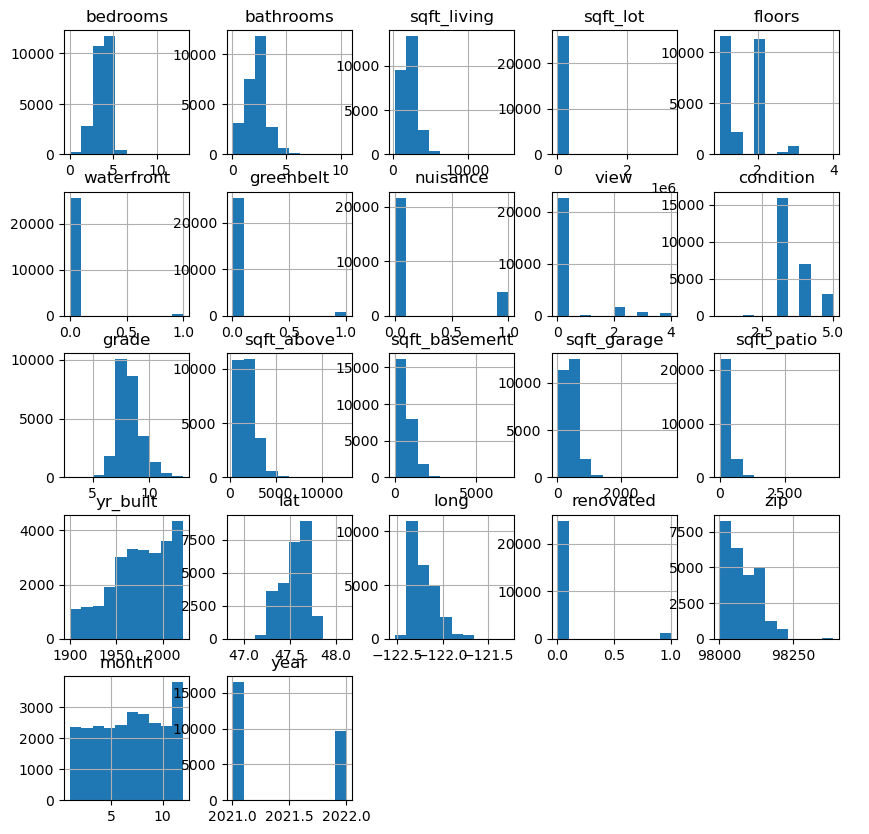

In [83]:
numeric_features_df.hist(figsize=(10,10))